In [5]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Celerates MSIB/ALL Dataset/DailyDelhiClimateTrain.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
df.date = pd.to_datetime(df.date)
df = df.rename(columns={'date':'ds','meantemp':'y'})
df.head()

,ds,y,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


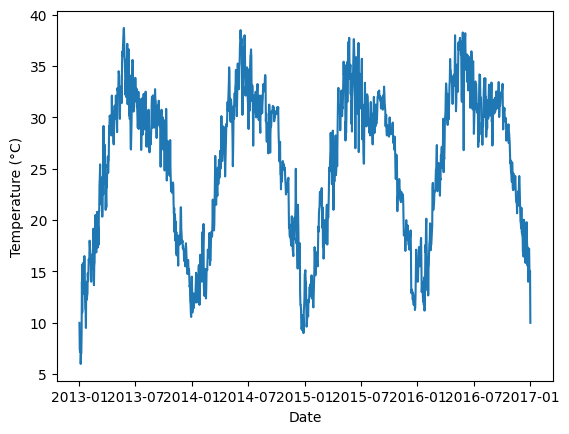

In [7]:
# Visualisasi data
plt.plot(df['ds'], df['y'])
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

In [8]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cp5x71s/cbp7srhe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cp5x71s/adypkciu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90015', 'data', 'file=/tmp/tmp_cp5x71s/cbp7srhe.json', 'init=/tmp/tmp_cp5x71s/adypkciu.json', 'output', 'file=/tmp/tmp_cp5x71s/prophet_modeld8kl6num/prophet_model-20241115100952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:09:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:09:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [9]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
1822,2017-12-28
1823,2017-12-29
1824,2017-12-30
1825,2017-12-31
1826,2018-01-01


In [10]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1822,2017-12-28,15.763790,12.996058,18.405227
1823,2017-12-29,15.666960,13.201167,18.393784
1824,2017-12-30,15.534900,12.873191,18.115820
1825,2017-12-31,15.394173,12.578077,18.031603
1826,2018-01-01,15.582847,13.003478,18.466990


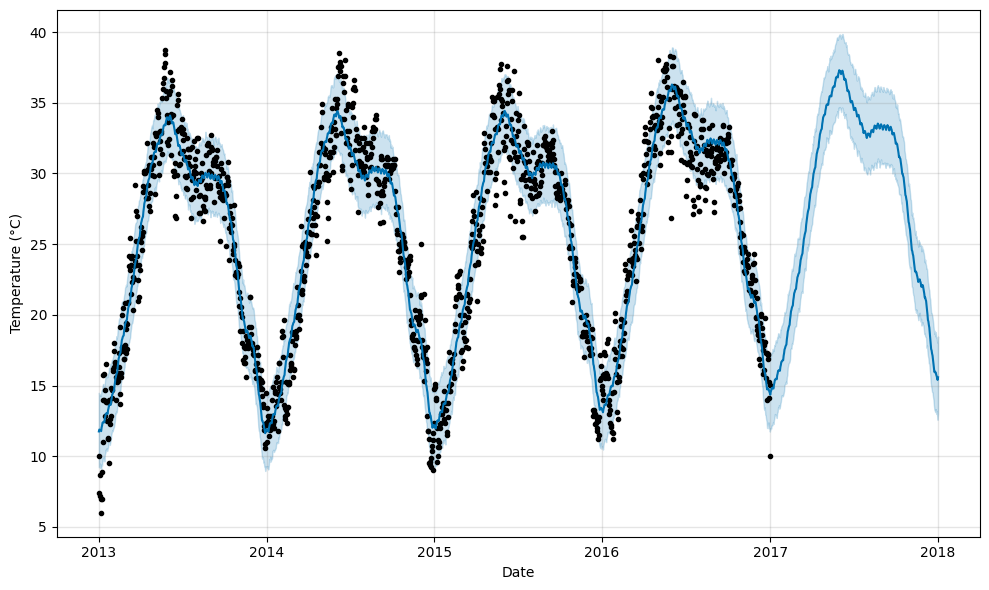

In [11]:
# Visualize

model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

In [12]:
future = df[df.ds > '2016-09-01']
train = df[df.ds <= '2016-09-01']

In [13]:
model = Prophet()
model.add_regressor('humidity')
model.add_regressor('wind_speed')
model.add_regressor('meanpressure')
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cp5x71s/srvo_7z_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cp5x71s/sdfz4fq0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79190', 'data', 'file=/tmp/tmp_cp5x71s/srvo_7z_.json', 'init=/tmp/tmp_cp5x71s/sdfz4fq0.json', 'output', 'file=/tmp/tmp_cp5x71s/prophet_model7p976w5o/prophet_model-20241115101632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:16:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:16:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [14]:
future.drop(columns=['y'], inplace=True)

<ipython-input-14-27d549af7c82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future.drop(columns=['y'], inplace=True)


In [15]:
future.tail()

,ds,humidity,wind_speed,meanpressure
1457,2016-12-28,68.043478,3.547826,1015.565217
1458,2016-12-29,87.857143,6.000000,1016.904762
1459,2016-12-30,89.666667,6.266667,1017.904762
1460,2016-12-31,87.000000,7.325000,1016.100000
1461,2017-01-01,100.000000,0.000000,1016.000000


In [16]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
117,2016-12-28,15.848134,13.720137,17.978627
118,2016-12-29,13.046671,10.964708,15.263845
119,2016-12-30,12.924663,10.735011,14.999778
120,2016-12-31,13.323246,11.288998,15.398113
121,2017-01-01,11.914468,9.834998,13.977976


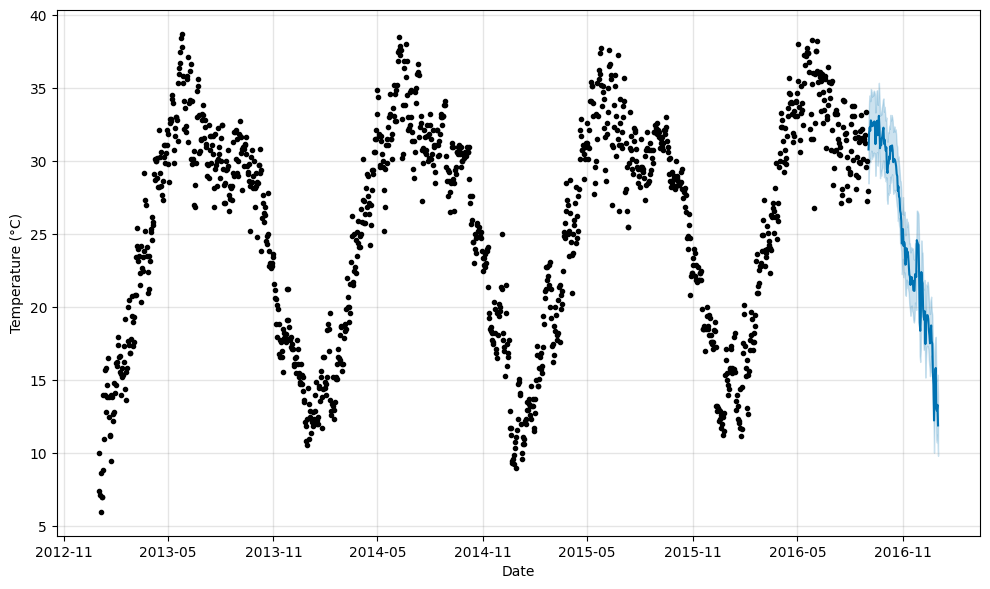

In [17]:
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()